In [2]:
# Mount Google Drive (already mounted, but included for completeness)
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
# Mount Google Drive (already mounted, but included for completeness)
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Block 1: Project Setup and Data Acquisition

# Install required libraries if not already installed
!pip install pandas numpy scikit-learn tensorflow matplotlib seaborn openpyxl

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



Mounted at /content/drive



1. Approved_Flag Distribution:
Counts:
 Approved_Flag
P2    32199
P3     7452
P4     5882
P1     5803
Name: count, dtype: int64
Percentages:
 Approved_Flag
P2    62.72
P3    14.52
P4    11.46
P1    11.30
Name: proportion, dtype: float64


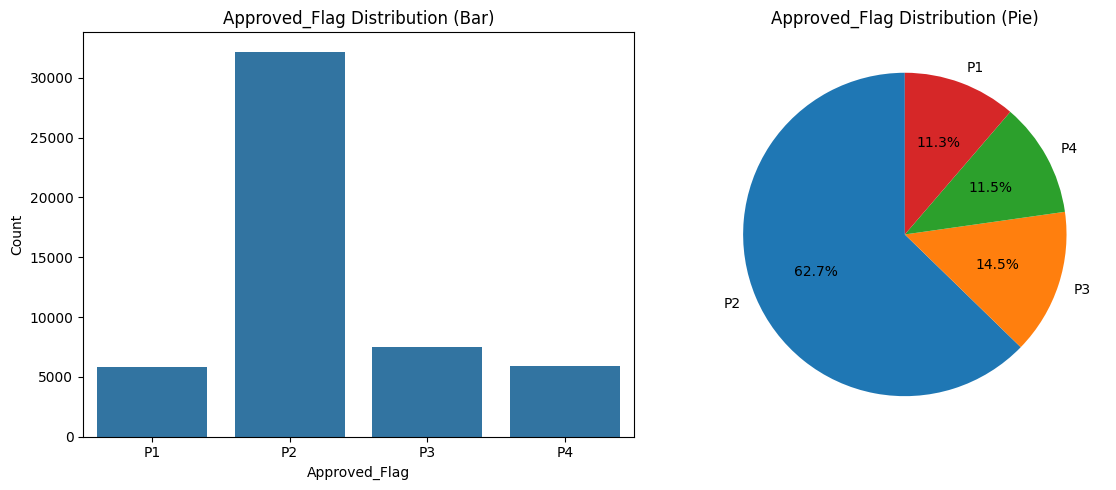


2. Summary Statistics for Key Features:

Credit_Score Statistics:
count    51336.000000
mean       679.859222
std         20.502764
min        469.000000
25%        669.000000
50%        680.000000
75%        691.000000
max        811.000000
Name: Credit_Score, dtype: float64

Tot_Active_TL Statistics:
count    51336.000000
mean         2.088184
std          2.290774
min          0.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         47.000000
Name: Tot_Active_TL, dtype: float64


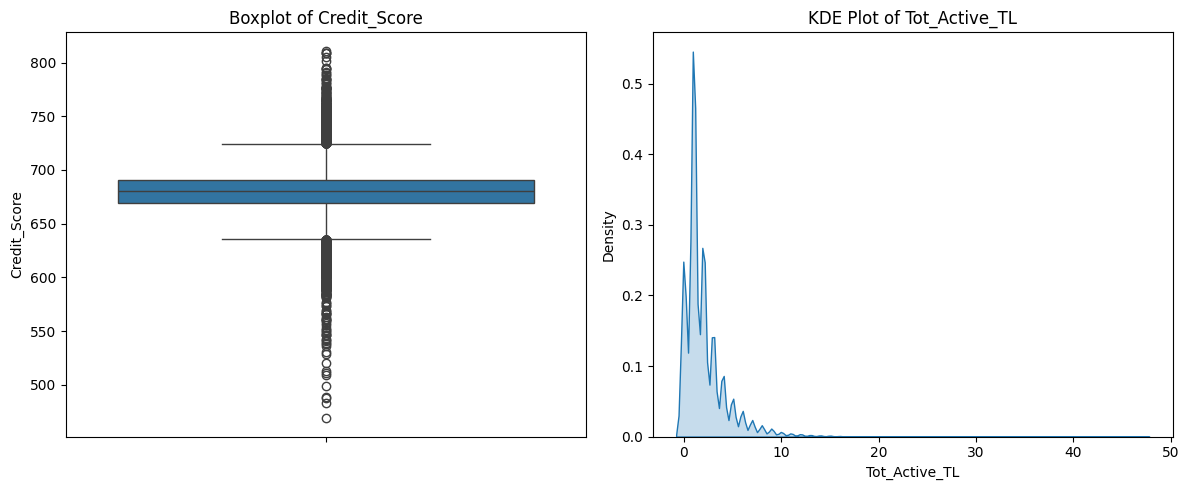


3. Top 10 Correlated Feature Pairs:
CC_enq_L6m   CC_enq_L12m    1.0
PL_enq_L6m   PL_enq_L12m    1.0
CC_enq       CC_enq_L12m    1.0
PL_enq_L12m  PL_enq         1.0
PL_enq_L6m   CC_enq_L6m     1.0
CC_enq       CC_enq_L6m     1.0
PL_enq_L6m   CC_enq_L12m    1.0
             PL_enq         1.0
CC_enq_L6m   PL_enq_L12m    1.0
PL_enq_L12m  CC_enq_L12m    1.0
dtype: float64


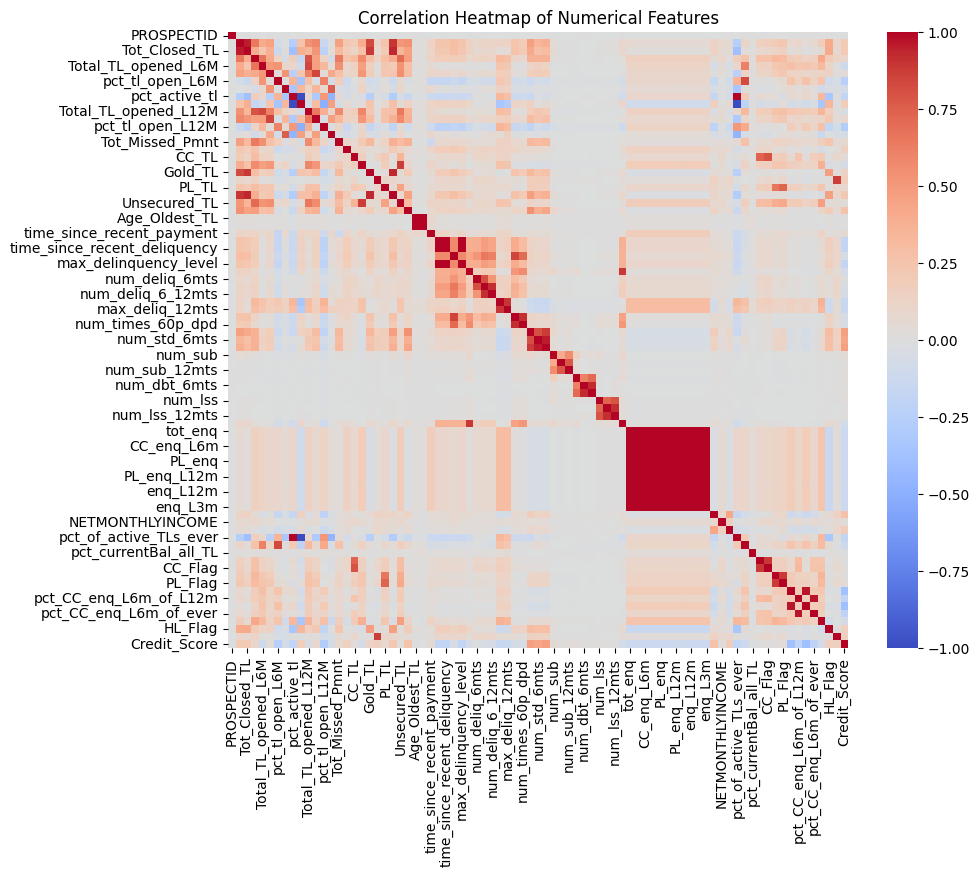


4. Feature Importance Analysis:

Top 10 Features by Importance:
                         Feature  Importance
79                  Credit_Score    0.466471
23                 Age_Oldest_TL    0.051867
61                       enq_L3m    0.047203
58         time_since_recent_enq    0.026576
60                       enq_L6m    0.025973
38                       num_std    0.019836
40                 num_std_12mts    0.019275
59                      enq_L12m    0.015591
39                  num_std_6mts    0.014513
27  time_since_recent_deliquency    0.012914


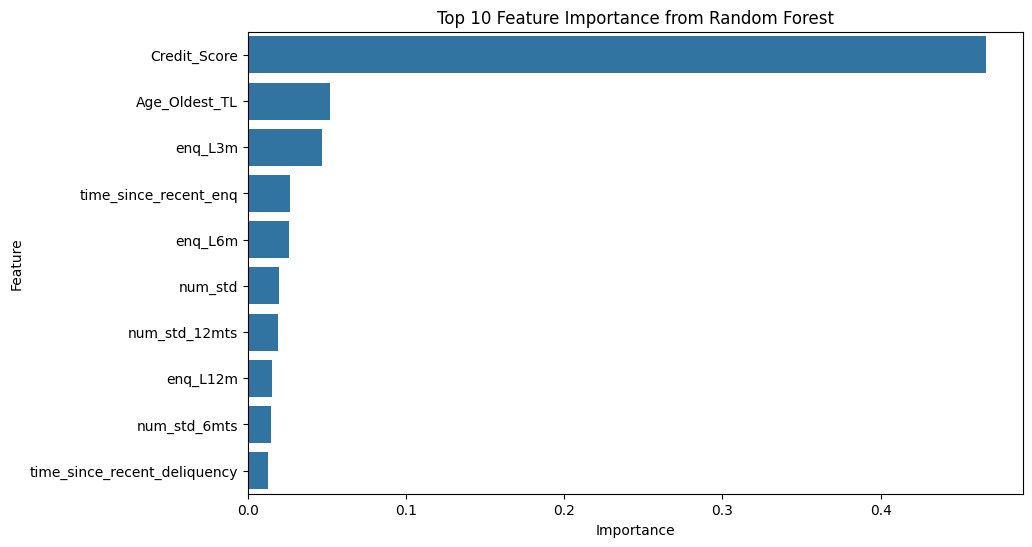

In [5]:
# Block 2: Exploratory Data Analysis

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier



# Load data (assuming done in Block 1, but reload for standalone execution)
internal_data_path = '/content/drive/MyDrive/cibil_score/Internal_Bank_Dataset.xlsx'
cibil_data_path = '/content/drive/MyDrive/cibil_score/External_Cibil_Dataset.xlsx'
internal_data = pd.read_excel(internal_data_path)
cibil_data = pd.read_excel(cibil_data_path)
merged_data = pd.merge(internal_data, cibil_data, on='PROSPECTID', how='inner')

# 1. Approved_Flag Distribution
print("\n1. Approved_Flag Distribution:")
approved_counts = merged_data['Approved_Flag'].value_counts()
approved_percentages = merged_data['Approved_Flag'].value_counts(normalize=True) * 100
print("Counts:\n", approved_counts)
print("Percentages:\n", approved_percentages.round(2))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=merged_data, x='Approved_Flag', order=['P1', 'P2', 'P3', 'P4'])
plt.title('Approved_Flag Distribution (Bar)')
plt.xlabel('Approved_Flag')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.pie(approved_counts, labels=approved_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Approved_Flag Distribution (Pie)')
plt.tight_layout()
plt.show()

# 2. Distributions of Key Numerical Features
print("\n2. Summary Statistics for Key Features:")
print("\nCredit_Score Statistics:")
print(merged_data['Credit_Score'].describe())
print("\nTot_Active_TL Statistics:")
print(merged_data['Tot_Active_TL'].describe())

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=merged_data['Credit_Score'])
plt.title('Boxplot of Credit_Score')

plt.subplot(1, 2, 2)
sns.kdeplot(data=merged_data, x='Tot_Active_TL', fill=True)
plt.title('KDE Plot of Tot_Active_TL')
plt.xlabel('Tot_Active_TL')
plt.tight_layout()
plt.show()

# 3. Correlation Heatmap
numerical_cols = merged_data.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = merged_data[numerical_cols].corr()

corr_unstacked = corr_matrix.unstack().sort_values(ascending=False)
corr_pairs = corr_unstacked[corr_unstacked != 1].drop_duplicates().head(10)
print("\n3. Top 10 Correlated Feature Pairs:")
print(corr_pairs.round(4))

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# 4. Feature Importance
print("\n4. Feature Importance Analysis:")
y = merged_data['Approved_Flag'].map({'P1': 0, 'P2': 1, 'P3': 2, 'P4': 3})
X = merged_data.drop(['Approved_Flag', 'PROSPECTID'], axis=1)

categorical_cols = X.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_encoded, y)
feature_importance = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop 10 Features by Importance:")
print(feature_importance.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Feature Importance from Random Forest')
plt.show()

In [6]:
# Block 3: Data Preprocessing (Fixed)

# Import required libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Load data
internal_data_path = '/content/drive/MyDrive/cibil_score/Internal_Bank_Dataset.xlsx'
cibil_data_path = '/content/drive/MyDrive/cibil_score/External_Cibil_Dataset.xlsx'
internal_data = pd.read_excel(internal_data_path)
cibil_data = pd.read_excel(cibil_data_path)
merged_data = pd.merge(internal_data, cibil_data, on='PROSPECTID', how='inner')
print("\n0. Original merged dataset shape:", merged_data.shape)

# 1. Handle Missing Values
merged_data = merged_data.replace(-99999, np.nan)
missing_counts = merged_data.isna().sum()
print("\n1. Missing Values per Column:")
print(missing_counts[missing_counts > 0])

columns_to_drop = missing_counts[missing_counts > 10000].index
if len(columns_to_drop) > 0:
    print("\nDropping columns with >10,000 missing values:", columns_to_drop.tolist())
    merged_data = merged_data.drop(columns=columns_to_drop)

initial_numerical_cols = merged_data.select_dtypes(include=['int64', 'float64']).columns
for col in initial_numerical_cols:
    if merged_data[col].isna().sum() > 0:
        merged_data[col] = merged_data[col].fillna(merged_data[col].mean())
print("\nRemaining missing values after imputation:")
print(merged_data.isna().sum()[merged_data.isna().sum() > 0])

# 2. Clean Approved_Flag
print("\n2. Approved_Flag Values Before Cleaning:")
print(merged_data['Approved_Flag'].value_counts(dropna=False))
valid_flags = ['P1', 'P2', 'P3', 'P4']
merged_data = merged_data[merged_data['Approved_Flag'].isin(valid_flags)].copy()
print("\nApproved_Flag Values After Cleaning:")
print(merged_data['Approved_Flag'].value_counts(dropna=False))
print("Shape after cleaning Approved_Flag:", merged_data.shape)

# 3. Remove Outliers
bounded_features = [
    'pct_tl_open_L6M', 'pct_tl_closed_L6M', 'pct_active_tl', 'pct_closed_tl',
    'pct_tl_open_L12M', 'pct_tl_closed_L12M', 'pct_of_active_TLs_ever',
    'pct_opened_TLs_L6m_of_L12m', 'pct_currentBal_all_TL', 'CC_Flag', 'PL_Flag',
    'pct_PL_enq_L6m_of_L12m', 'pct_CC_enq_L6m_of_L12m', 'pct_PL_enq_L6m_of_ever',
    'pct_CC_enq_L6m_of_ever', 'HL_Flag', 'GL_Flag'
]
current_numerical_cols = merged_data.select_dtypes(include=['int64', 'float64']).columns
unbounded_numerical_cols = [col for col in current_numerical_cols if col not in bounded_features and col != 'PROSPECTID']
for col in unbounded_numerical_cols:
    mean = merged_data[col].mean()
    std = merged_data[col].std()
    merged_data = merged_data[(merged_data[col] >= mean - 4 * std) & (merged_data[col] <= mean + 4 * std)].copy()
print("\n3. Shape after outlier removal:", merged_data.shape)

# 4. Encode Categorical Variables
merged_data['Approved_Flag'] = merged_data['Approved_Flag'].map({'P1': 0, 'P2': 1, 'P3': 2, 'P4': 3})
X = merged_data.drop(['Approved_Flag', 'PROSPECTID'], axis=1)
y = merged_data['Approved_Flag']
categorical_cols = X.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
print("\n4. X shape after encoding:", X.shape)
print("X columns after encoding (first 20):", X.columns.tolist()[:20], "...")

# 5. Dataset Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print("\n5. Dataset Split Summary:")
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)
print("\nTraining set Approved_Flag distribution:")
print(y_train.value_counts(normalize=True).round(2))
print("\nTesting set Approved_Flag distribution:")
print(y_test.value_counts(normalize=True).round(2))

# 6. Data Normalization
scaler = MinMaxScaler()
numerical_cols_X_train = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
scaler.fit(X_train[numerical_cols_X_train])
X_train[numerical_cols_X_train] = scaler.transform(X_train[numerical_cols_X_train])
X_test[numerical_cols_X_train] = scaler.transform(X_test[numerical_cols_X_train])

print("\n6. Summary Statistics after Normalization (Sample for Credit_Score):")
if 'Credit_Score' in X_train.columns:
    print(X_train['Credit_Score'].describe())
else:
    print("Credit_Score column not found in X_train.")

# Save variables for Block 5
global columns_to_drop, numerical_cols_X_train
print("\nSaved columns_to_drop and numerical_cols_X_train for Block 5.")


0. Original merged dataset shape: (51336, 87)

1. Missing Values per Column:
Age_Oldest_TL                      40
Age_Newest_TL                      40
time_since_recent_payment        4291
time_since_first_deliquency     35949
time_since_recent_deliquency    35949
max_delinquency_level           35949
max_deliq_6mts                  12890
max_deliq_12mts                 10832
tot_enq                          6321
CC_enq                           6321
CC_enq_L6m                       6321
CC_enq_L12m                      6321
PL_enq                           6321
PL_enq_L6m                       6321
PL_enq_L12m                      6321
time_since_recent_enq            6321
enq_L12m                         6321
enq_L6m                          6321
enq_L3m                          6321
pct_currentBal_all_TL              72
CC_utilization                  47636
PL_utilization                  44435
max_unsec_exposure_inPct        23178
dtype: int64

Dropping columns with >10,000 miss

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


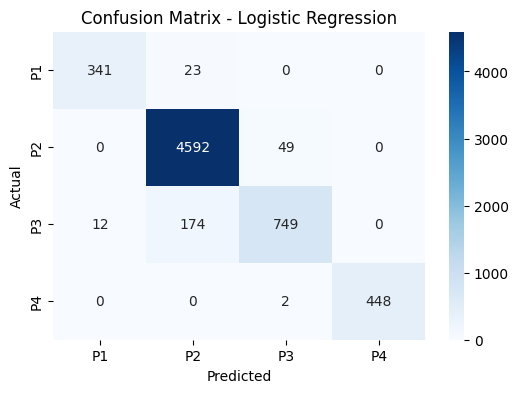

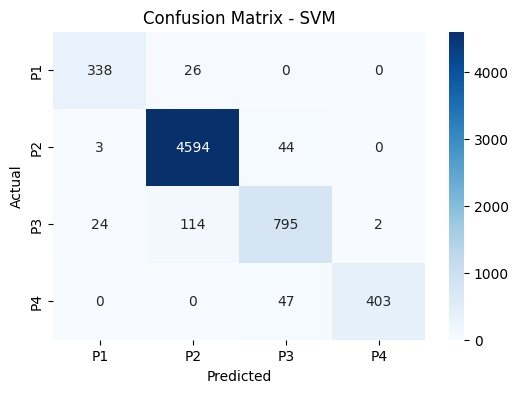

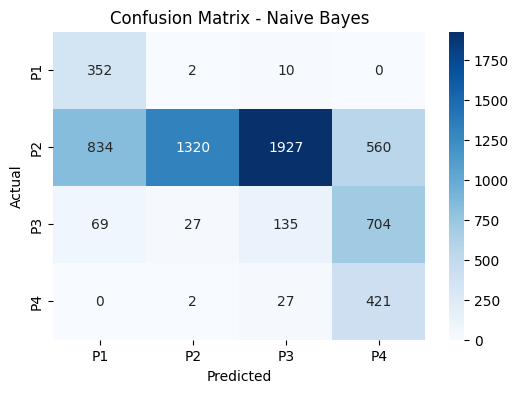

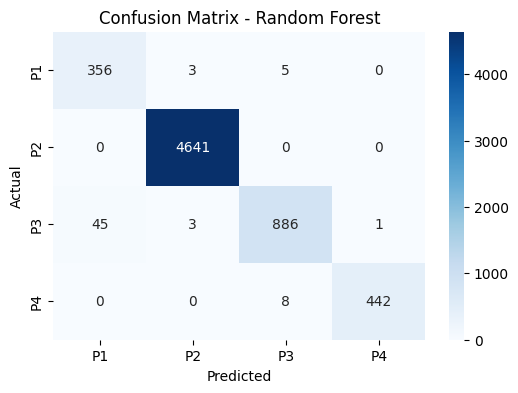

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.7108 - loss: 0.8242 - val_accuracy: 0.8169 - val_loss: 0.4316
Epoch 2/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8135 - loss: 0.4444 - val_accuracy: 0.8638 - val_loss: 0.3190
Epoch 3/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8603 - loss: 0.3342 - val_accuracy: 0.9008 - val_loss: 0.2448
Epoch 4/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8858 - loss: 0.2696 - val_accuracy: 0.9020 - val_loss: 0.2289
Epoch 5/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9049 - loss: 0.2362 - val_accuracy: 0.9178 - val_loss: 0.1910
Epoch 6/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9188 - loss: 0.2033 - val_accuracy: 0.9415 - val_loss: 0.1534
Epoch 7/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9261 - loss: 0.1847 - val_accuracy: 0.9442 - val_loss: 0.1468
Epoch 8/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9368 - loss: 0.1588 - val_accuracy: 0

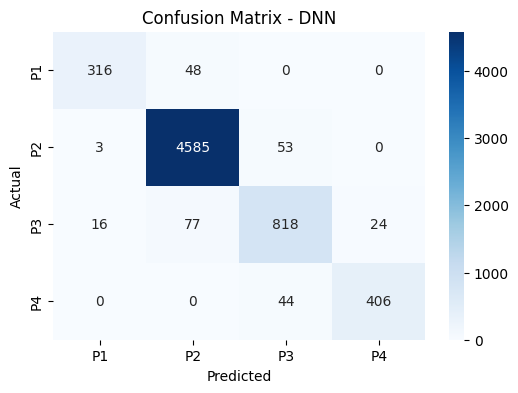


Model Comparison:
                 Model  Accuracy  F1-Score  AUC-ROC  Training Time (s)
0  Logistic Regression    0.9593    0.9581   0.9836            92.0405
1                  SVM    0.9593    0.9588   0.9936            70.4532
2          Naive Bayes    0.3487    0.3856   0.7944             0.0421
3        Random Forest    0.9898    0.9899   0.9994             3.0088
4                  DNN    0.9585    0.9581   0.9961            48.5958


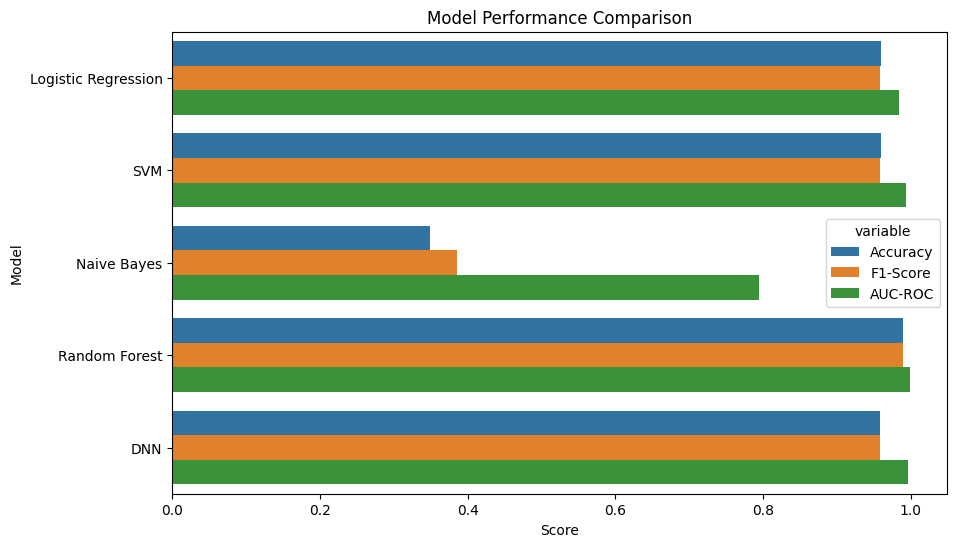

In [7]:
# Block 4: Model Implementation (Fixed)

# Import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import label_binarize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time



# Initialize models
models = {
    'Logistic Regression': LogisticRegression(multi_class='multinomial', penalty='l1', solver='saga', max_iter=1000, random_state=42),
    'SVM': SVC(kernel='linear', probability=True, random_state=42),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Train and evaluate traditional models
results = []
for name, model in models.items():
    start_time = time()
    model.fit(X_train, y_train)
    train_time = time() - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test)
        auc = roc_auc_score(y_test_bin, y_pred_proba, multi_class='ovr')
    else:
        auc = np.nan
        print(f"Warning: {name} does not support predict_proba.")

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'F1-Score': f1,
        'AUC-ROC': auc,
        'Training Time (s)': train_time
    })

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['P1', 'P2', 'P3', 'P4'], yticklabels=['P1', 'P2', 'P3', 'P4'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Train DNN
dnn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.1),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(32, activation='relu'),
    Dense(4, activation='softmax')
])

dnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
start_time = time()
history = dnn_model.fit(X_train, y_train, epochs=30, batch_size=64, validation_split=0.2, verbose=1)
train_time = time() - start_time

# Evaluate DNN
y_pred_proba = dnn_model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
auc = roc_auc_score(y_test_bin, y_pred_proba, multi_class='ovr')

results.append({
    'Model': 'DNN',
    'Accuracy': accuracy,
    'F1-Score': f1,
    'AUC-ROC': auc,
    'Training Time (s)': train_time
})

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['P1', 'P2', 'P3', 'P4'], yticklabels=['P1', 'P2', 'P3', 'P4'])
plt.title('Confusion Matrix - DNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display results
results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(results_df.round(4))

# Plot comparison
plt.figure(figsize=(10, 6))
results_df_melted = results_df.melt(id_vars='Model', value_vars=['Accuracy', 'F1-Score', 'AUC-ROC'])
sns.barplot(x='value', y='Model', hue='variable', data=results_df_melted)
plt.title('Model Performance Comparison')
plt.xlabel('Score')
plt.show()


0. Unseen dataset shape: (100, 42)

Unseen dataset columns: ['pct_tl_open_L6M', 'pct_tl_closed_L6M', 'Tot_TL_closed_L12M', 'pct_tl_closed_L12M', 'Tot_Missed_Pmnt', 'CC_TL', 'Home_TL', 'PL_TL', 'Secured_TL', 'Unsecured_TL', 'Other_TL', 'Age_Oldest_TL', 'Age_Newest_TL', 'time_since_recent_payment', 'max_recent_level_of_deliq', 'num_deliq_6_12mts', 'num_times_60p_dpd', 'num_std_12mts', 'num_sub', 'num_sub_6mts', 'num_sub_12mts', 'num_dbt', 'num_dbt_12mts', 'num_lss', 'recent_level_of_deliq', 'CC_enq_L12m', 'PL_enq_L12m', 'time_since_recent_enq', 'enq_L3m', 'NETMONTHLYINCOME', 'Time_With_Curr_Empr', 'CC_Flag', 'PL_Flag', 'pct_PL_enq_L6m_of_ever', 'pct_CC_enq_L6m_of_ever', 'HL_Flag', 'GL_Flag', 'MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']

1. Approved_Flag not found in unseen dataset. Proceeding with prediction only.

2. Unseen dataset shape after preprocessing: (100, 90)
Unseen dataset columns after alignment (first 20): ['Total_TL', 'Tot_Closed_TL', 'Tot_A

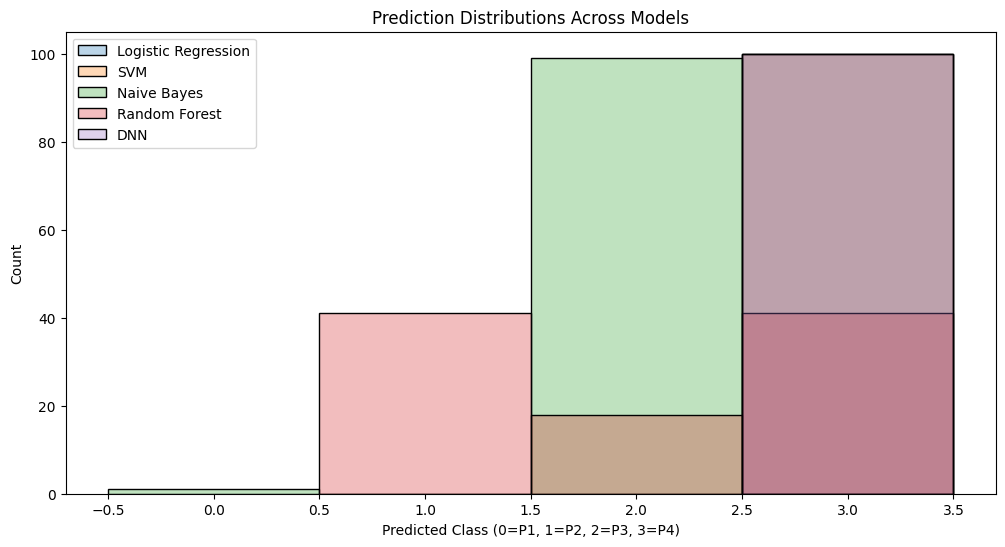

In [8]:
# Block 5: Prediction on Unseen Dataset (Fixed)

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure scaler, X_train, models, dnn_model, columns_to_drop, numerical_cols_X_train from Blocks 3 and 4
if 'columns_to_drop' not in globals() or 'numerical_cols_X_train' not in globals():
    print("Error: Required variables from Block 3 missing. Please run Block 3.")
    raise SystemExit
if 'models' not in globals() or 'dnn_model' not in locals():
    print("Error: Models from Block 4 missing. Please run Block 4.")
    raise SystemExit

# Load unseen dataset
unseen_data_path = '/content/drive/MyDrive/cibil_score/Unseen_Dataset.xlsx'
unseen_data = pd.read_excel(unseen_data_path)
print("\n0. Unseen dataset shape:", unseen_data.shape)
print("\nUnseen dataset columns:", unseen_data.columns.tolist())

# Store PROSPECTID
prospect_id = unseen_data['PROSPECTID'].copy() if 'PROSPECTID' in unseen_data.columns else pd.Series(range(1, len(unseen_data) + 1), name='PROSPECTID')
if 'PROSPECTID' in unseen_data.columns:
    unseen_data = unseen_data.drop(columns=['PROSPECTID'])

# Check for Approved_Flag
if 'Approved_Flag' in unseen_data.columns:
    print("\n1. Approved_Flag Values Before Cleaning:")
    print(unseen_data['Approved_Flag'].value_counts(dropna=False))
    unseen_data = unseen_data.drop(columns=['Approved_Flag'])
else:
    print("\n1. Approved_Flag not found in unseen dataset. Proceeding with prediction only.")

# 2. Preprocess Unseen Dataset
unseen_data = unseen_data.replace(-99999, np.nan)
unseen_data = unseen_data.drop(columns=[col for col in columns_to_drop if col in unseen_data.columns])

numerical_cols = unseen_data.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    if col in X_train.columns and unseen_data[col].isna().sum() > 0:
        unseen_data[col] = unseen_data[col].fillna(X_train[col].mean())

categorical_cols = unseen_data.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    train_dummy_cols = [col for col in X_train.columns if any(cat in col for cat in ['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2'])]
    unseen_data = pd.get_dummies(unseen_data, columns=categorical_cols, drop_first=True)
    for col in train_dummy_cols:
        if col not in unseen_data.columns:
            unseen_data[col] = 0
    unseen_data = unseen_data[[col for col in unseen_data.columns if col in X_train.columns or col not in train_dummy_cols]]

missing_cols = set(X_train.columns) - set(unseen_data.columns)
for col in missing_cols:
    unseen_data[col] = 0
X_unseen = unseen_data[X_train.columns]
print("\n2. Unseen dataset shape after preprocessing:", X_unseen.shape)
print("Unseen dataset columns after alignment (first 20):", X_unseen.columns.tolist()[:20], "...")

numerical_cols_to_transform = [col for col in numerical_cols_X_train if col in X_unseen.columns]
if len(numerical_cols_to_transform) > 0:
    X_unseen[numerical_cols_to_transform] = scaler.transform(X_unseen[numerical_cols_to_transform])
else:
    print("\nWarning: No matching numerical columns for scaling.")

# 3. Generate Predictions
predictions = {}
for name, model in models.items():
    if hasattr(model, 'predict'):
        try:
            y_pred = model.predict(X_unseen)
            predictions[name] = y_pred
            label_mapping = {0: 'P1', 1: 'P2', 2: 'P3', 3: 'P4'}
            predicted_labels = [label_mapping[p] for p in y_pred]
            print(f"\n{name} Predictions (first 10):", predicted_labels[:10])
        except Exception as e:
            print(f"\nError predicting with {name}: {e}")
            predictions[name] = [np.nan] * len(X_unseen)
    else:
        print(f"\nModel {name} not trained.")
        predictions[name] = [np.nan] * len(X_unseen)

if 'dnn_model' in locals() and hasattr(dnn_model, 'predict'):
    try:
        y_pred_proba = dnn_model.predict(X_unseen)
        y_pred = np.argmax(y_pred_proba, axis=1)
        predictions['DNN'] = y_pred
        label_mapping = {0: 'P1', 1: 'P2', 2: 'P3', 3: 'P4'}
        predicted_labels = [label_mapping[p] for p in y_pred]
        print("\nDNN Predictions (first 10):", predicted_labels[:10])
    except Exception as e:
        print(f"\nError predicting with DNN: {e}")
        predictions['DNN'] = [np.nan] * len(X_unseen)
else:
    print("\nDNN model not trained.")
    predictions['DNN'] = [np.nan] * len(X_unseen)

# Save predictions to CSV
prediction_df = pd.DataFrame({name: [label_mapping.get(p, 'Unknown') for p in preds] for name, preds in predictions.items()})
prediction_df['PROSPECTID'] = prospect_id.reset_index(drop=True)
prediction_df = prediction_df[['PROSPECTID'] + [col for col in prediction_df.columns if col != 'PROSPECTID']]
prediction_df.to_csv('/content/unseen_predictions.csv', index=False)
print("\n4. Predictions saved to '/content/unseen_predictions.csv'")

# Plot prediction distributions
plt.figure(figsize=(12, 6))
for name, preds in predictions.items():
    if not np.isnan(preds).all():
        sns.histplot(preds, label=name, discrete=True, stat='count', alpha=0.3)
plt.title('Prediction Distributions Across Models')
plt.xlabel('Predicted Class (0=P1, 1=P2, 2=P3, 3=P4)')
plt.ylabel('Count')
plt.legend()
plt.show()

In [9]:
import joblib

# Save Random Forest model
joblib.dump(models['Random Forest'], '/content/drive/MyDrive/cibil_score/random_forest_model.pkl')

# Save scaler
joblib.dump(scaler, '/content/drive/MyDrive/cibil_score/scaler.pkl')

# Save X_train columns and means for preprocessing
X_train_columns = X_train.columns.tolist()
X_train_means = X_train.mean().to_dict()
joblib.dump(X_train_columns, '/content/drive/MyDrive/cibil_score/X_train_columns.pkl')
joblib.dump(X_train_means, '/content/drive/MyDrive/cibil_score/X_train_means.pkl')

# Save columns_to_drop
joblib.dump(columns_to_drop, '/content/drive/MyDrive/cibil_score/columns_to_drop.pkl')

print("Model, scaler, and preprocessing artifacts saved.")

Model, scaler, and preprocessing artifacts saved.


In [11]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 89.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.7 MB/s eta 0:00:00


In [12]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib

# Set page config
st.set_page_config(page_title="Credit Eligibility Checker", page_icon="💳", layout="centered")

# Load model and preprocessing artifacts
@st.cache_resource
def load_artifacts():
    model = joblib.load('/content/drive/MyDrive/cibil_score/random_forest_model.pkl')
    scaler = joblib.load('/content/drive/MyDrive/cibil_score/scaler.pkl')
    X_train_columns = joblib.load('/content/drive/MyDrive/cibil_score/X_train_columns.pkl')
    X_train_means = joblib.load('/content/drive/MyDrive/cibil_score/X_train_means.pkl')
    columns_to_drop = joblib.load('/content/drive/MyDrive/cibil_score/columns_to_drop.pkl')
    return model, scaler, X_train_columns, X_train_means, columns_to_drop

model, scaler, X_train_columns, X_train_means, columns_to_drop = load_artifacts()

# Preprocessing function (matches Block 5)
def preprocess_input(input_data, X_train_columns, X_train_means, columns_to_drop, scaler):
    df = pd.DataFrame([input_data])

    # Replace -99999 with NaN
    df = df.replace(-99999, np.nan)

    # Drop columns
    df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], errors='ignore')

    # Impute missing numerical values with X_train means
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    for col in numerical_cols:
        if col in X_train_means and df[col].isna().sum() > 0:
            df[col] = df[col].fillna(X_train_means[col])

    # One-hot encode categorical variables
    categorical_cols = df.select_dtypes(include=['object']).columns
    if len(categorical_cols) > 0:
        train_dummy_cols = [col for col in X_train_columns if any(cat in col for cat in ['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2'])]
        df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
        for col in train_dummy_cols:
            if col not in df.columns:
                df[col] = 0
        df = df[[col for col in df.columns if col in X_train_columns or col not in train_dummy_cols]]

    # Align with X_train columns
    missing_cols = set(X_train_columns) - set(df.columns)
    for col in missing_cols:
        df[col] = 0
    df = df[X_train_columns]

    # Scale numerical features
    numerical_cols = [col for col in df.columns if col in scaler.feature_names_in_]
    if numerical_cols:
        df[numerical_cols] = scaler.transform(df[numerical_cols])

    return df

# Streamlit UI
st.title("💳 Credit Eligibility Checker")
st.markdown("Enter your details to check your credit eligibility. Predictions are based on a machine learning model trained on banking data.")

# Input form
with st.form("eligibility_form"):
    st.subheader("Personal and Financial Details")

    col1, col2 = st.columns(2)
    with col1:
        credit_score = st.number_input("Credit Score (469–811)", min_value=469, max_value=811, value=680, step=1)
        net_monthly_income = st.number_input("Net Monthly Income (₹)", min_value=0, value=50000, step=1000)
        age_oldest_tl = st.number_input("Age of Oldest Trade Line (months)", min_value=0, value=60, step=1)
        tot_missed_pmnt = st.number_input("Total Missed Payments", min_value=0, value=0, step=1)
        enq_l3m = st.number_input("Enquiries in Last 3 Months", min_value=0, value=0, step=1)
        time_since_recent_enq = st.number_input("Time Since Recent Enquiry (days)", min_value=0, value=30, step=1)
    with col2:
        marital_status = st.selectbox("Marital Status", ["Married", "Single"])
        education = st.selectbox("Education", ["SSC", "12TH", "GRADUATE", "UNDER GRADUATE", "POST-GRADUATE", "PROFESSIONAL", "OTHERS"])
        gender = st.selectbox("Gender", ["M", "F"])
        last_prod_enq2 = st.selectbox("Last Product Enquired", ["PL", "CC", "HL", "GL", "others"])
        first_prod_enq2 = st.selectbox("First Product Enquired", ["PL", "CC", "HL", "GL", "others"])
        time_with_curr_empr = st.number_input("Time with Current Employer (months)", min_value=0, value=24, step=1)

    submit_button = st.form_submit_button("Check Eligibility")

# Process submission
if submit_button:
    with st.spinner("Processing your details..."):
        # Create input dictionary
        input_data = {
            'Credit_Score': credit_score,
            'NETMONTHLYINCOME': net_monthly_income,
            'Age_Oldest_TL': age_oldest_tl,
            'Tot_Missed_Pmnt': tot_missed_pmnt,
            'enq_L3m': enq_l3m,
            'time_since_recent_enq': time_since_recent_enq,
            'MARITALSTATUS': marital_status,
            'EDUCATION': education,
            'GENDER': gender,
            'last_prod_enq2': last_prod_enq2,
            'first_prod_enq2': first_prod_enq2,
            'Time_With_Curr_Empr': time_with_curr_empr
        }

        # Preprocess input
        try:
            X_input = preprocess_input(input_data, X_train_columns, X_train_means, columns_to_drop, scaler)

            # Predict
            pred = model.predict(X_input)[0]
            label_mapping = {0: 'P1', 1: 'P2', 2: 'P3', 3: 'P4'}
            pred_label = label_mapping[pred]

            # Display result
            st.success("Eligibility Check Complete!")
            if pred_label == 'P1':
                st.markdown("🎉 **Highly Eligible (P1)**: You qualify for premium credit products with the best terms!")
            elif pred_label == 'P2':
                st.markdown("✅ **Eligible (P2)**: You qualify for standard credit products with favorable terms.")
            elif pred_label == 'P3':
                st.markdown("⚠️ **Moderately Eligible (P3)**: You may qualify for limited credit products. Consider improving your credit score.")
            else:
                st.markdown("❌ **Not Eligible (P4)**: You may not qualify at this time. Contact our team for advice.")

            # Simple explanation
            st.subheader("Key Factors")
            if credit_score > 700:
                st.markdown("- **High Credit Score**: Your score significantly boosts your eligibility.")
            if enq_l3m > 3:
                st.markdown("- **High Recent Enquiries**: Multiple recent enquiries may lower your eligibility.")
            if tot_missed_pmnt > 0:
                st.markdown("- **Missed Payments**: Past missed payments negatively impact your eligibility.")

        except Exception as e:
            st.error(f"Error processing your request: {str(e)}")
            st.markdown("Please check your inputs and try again.")

# Footer
st.markdown("---")
st.markdown("**Note**: This tool uses a Random Forest model trained on banking data. For official eligibility, contact your bank.")
st.markdown("Developed by [Your Name] | Powered by Streamlit")

2025-05-19 11:30:16.661 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-19 11:30:16.665 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-19 11:30:16.803 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-05-19 11:30:16.804 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-19 11:30:16.805 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-19 11:30:16.918 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-19 11:30:16.918 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn

DeltaGenerator(_form_data=FormData(form_id='eligibility_form'))

In [13]:
import os

path = '/content/drive/MyDrive/cibil_score/'
required_files = [
    'random_forest_model.pkl',
    'scaler.pkl',
    'X_train_columns.pkl',
    'X_train_means.pkl',
    'columns_to_drop.pkl'
]

for file in required_files:
    if os.path.exists(os.path.join(path, file)):
        print(f"{file} found.")
    else:
        print(f"ERROR: {file} not found.")

random_forest_model.pkl found.
scaler.pkl found.
X_train_columns.pkl found.
X_train_means.pkl found.
columns_to_drop.pkl found.


In [14]:
import joblib
joblib.dump(models['Random Forest'], '/content/drive/MyDrive/cibil_score/random_forest_model.pkl')
joblib.dump(scaler, '/content/drive/MyDrive/cibil_score/scaler.pkl')
joblib.dump(X_train.columns.tolist(), '/content/drive/MyDrive/cibil_score/X_train_columns.pkl')
joblib.dump(X_train.mean().to_dict(), '/content/drive/MyDrive/cibil_score/X_train_means.pkl')
joblib.dump(columns_to_drop, '/content/drive/MyDrive/cibil_score/columns_to_drop.pkl')

['/content/drive/MyDrive/cibil_score/columns_to_drop.pkl']

In [17]:
# Install Streamlit and pyngrok
!pip install streamlit pyngrok

# Save app.py to Colab's filesystem
app_code = """
import streamlit as st
import pandas as pd
import numpy as np
import joblib

# Set page config
st.set_page_config(page_title="Credit Eligibility Checker", page_icon="💳", layout="centered")

# Load model and preprocessing artifacts
@st.cache_resource
def load_artifacts():
    model = joblib.load('/content/drive/MyDrive/cibil_score/random_forest_model.pkl')
    scaler = joblib.load('/content/drive/MyDrive/cibil_score/scaler.pkl')
    X_train_columns = joblib.load('/content/drive/MyDrive/cibil_score/X_train_columns.pkl')
    X_train_means = joblib.load('/content/drive/MyDrive/cibil_score/X_train_means.pkl')
    columns_to_drop = joblib.load('/content/drive/MyDrive/cibil_score/columns_to_drop.pkl')
    return model, scaler, X_train_columns, X_train_means, columns_to_drop

model, scaler, X_train_columns, X_train_means, columns_to_drop = load_artifacts()

# Preprocessing function (matches Block 5)
def preprocess_input(input_data, X_train_columns, X_train_means, columns_to_drop, scaler):
    df = pd.DataFrame([input_data])

    # Replace -99999 with NaN
    df = df.replace(-99999, np.nan)

    # Drop columns
    df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], errors='ignore')

    # Impute missing numerical values with X_train means
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    for col in numerical_cols:
        if col in X_train_means and df[col].isna().sum() > 0:
            df[col] = df[col].fillna(X_train_means[col])

    # One-hot encode categorical variables
    categorical_cols = df.select_dtypes(include=['object']).columns
    if len(categorical_cols) > 0:
        train_dummy_cols = [col for col in X_train_columns if any(cat in col for cat in ['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2'])]
        df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
        for col in train_dummy_cols:
            if col not in df.columns:
                df[col] = 0
        df = df[[col for col in df.columns if col in X_train_columns or col not in train_dummy_cols]]

    # Align with X_train columns
    missing_cols = set(X_train_columns) - set(df.columns)
    for col in missing_cols:
        df[col] = 0
    df = df[X_train_columns]

    # Scale numerical features
    numerical_cols = [col for col in df.columns if col in scaler.feature_names_in_]
    if numerical_cols:
        df[numerical_cols] = scaler.transform(df[numerical_cols])

    return df

# Streamlit UI
st.title("💳 Credit Eligibility Checker")
st.markdown("Enter your details to check your credit eligibility. Predictions are based on a machine learning model trained on banking data.")

# Input form
with st.form("eligibility_form"):
    st.subheader("Personal and Financial Details")

    col1, col2 = st.columns(2)
    with col1:
        credit_score = st.number_input("Credit Score (469–811)", min_value=469, max_value=811, value=680, step=1)
        net_monthly_income = st.number_input("Net Monthly Income (₹)", min_value=0, value=50000, step=1000)
        age_oldest_tl = st.number_input("Age of Oldest Trade Line (months)", min_value=0, value=60, step=1)
        tot_missed_pmnt = st.number_input("Total Missed Payments", min_value=0, value=0, step=1)
        enq_l3m = st.number_input("Enquiries in Last 3 Months", min_value=0, value=0, step=1)
        time_since_recent_enq = st.number_input("Time Since Recent Enquiry (days)", min_value=0, value=30, step=1)
    with col2:
        marital_status = st.selectbox("Marital Status", ["Married", "Single"])
        education = st.selectbox("Education", ["SSC", "12TH", "GRADUATE", "UNDER GRADUATE", "POST-GRADUATE", "PROFESSIONAL", "OTHERS"])
        gender = st.selectbox("Gender", ["M", "F"])
        last_prod_enq2 = st.selectbox("Last Product Enquired", ["PL", "CC", "HL", "GL", "others"])
        first_prod_enq2 = st.selectbox("First Product Enquired", ["PL", "CC", "HL", "GL", "others"])
        time_with_curr_empr = st.number_input("Time with Current Employer (months)", min_value=0, value=24, step=1)

    submit_button = st.form_submit_button("Check Eligibility")

# Process submission
if submit_button:
    with st.spinner("Processing your details..."):
        # Create input dictionary
        input_data = {
            'Credit_Score': credit_score,
            'NETMONTHLYINCOME': net_monthly_income,
            'Age_Oldest_TL': age_oldest_tl,
            'Tot_Missed_Pmnt': tot_missed_pmnt,
            'enq_L3m': enq_l3m,
            'time_since_recent_enq': time_since_recent_enq,
            'MARITALSTATUS': marital_status,
            'EDUCATION': education,
            'GENDER': gender,
            'last_prod_enq2': last_prod_enq2,
            'first_prod_enq2': first_prod_enq2,
            'Time_With_Curr_Empr': time_with_curr_empr
        }

        # Preprocess input
        try:
            X_input = preprocess_input(input_data, X_train_columns, X_train_means, columns_to_drop, scaler)

            # Predict
            pred = model.predict(X_input)[0]
            label_mapping = {0: 'P1', 1: 'P2', 2: 'P3', 3: 'P4'}
            pred_label = label_mapping[pred]

            # Display result
            st.success("Eligibility Check Complete!")
            if pred_label == 'P1':
                st.markdown("🎉 **Highly Eligible (P1)**: You qualify for premium credit products with the best terms!")
            elif pred_label == 'P2':
                st.markdown("✅ **Eligible (P2)**: You qualify for standard credit products with favorable terms.")
            elif pred_label == 'P3':
                st.markdown("⚠️ **Moderately Eligible (P3)**: You may qualify for limited credit products. Consider improving your credit score.")
            else:
                st.markdown("❌ **Not Eligible (P4)**: You may not qualify at this time. Contact our team for advice.")

            # Simple explanation
            st.subheader("Key Factors")
            if credit_score > 700:
                st.markdown("- **High Credit Score**: Your score significantly boosts your eligibility.")
            if enq_l3m > 3:
                st.markdown("- **High Recent Enquiries**: Multiple recent enquiries may lower your eligibility.")
            if tot_missed_pmnt > 0:
                st.markdown("- **Missed Payments**: Past missed payments negatively impact your eligibility.")

        except Exception as e:
            st.error(f"Error processing your request: {str(e)}")
            st.markdown("Please check your inputs and try again.")

# Footer
st.markdown("---")
st.markdown("**Note**: This tool uses a Random Forest model trained on banking data. For official eligibility, contact your bank.")
st.markdown("Developed by REHAMAN KHAN H.K | Powered by Streamlit")
"""

with open('/content/app.py', 'w') as f:
    f.write(app_code)

print("app.py saved to /content/app.py")

# Set up ngrok and run Streamlit
from pyngrok import ngrok

# Replace with your ngrok authtoken (sign up at https://ngrok.com to get one)
# IMPORTANT: Replace 'YOUR_NGROK_AUTH_TOKEN' with your actual ngrok authtoken
!ngrok authtoken '2w1hahlBOeRtPJRWSaVbZLH25Vt_7BL7xYuZE3diSuQejDeNn'

# Start Streamlit
!streamlit run /content/app.py &>/dev/null &

# Create public URL
public_url = ngrok.connect(8501)
print(f"Streamlit app running at: {public_url}")

app.py saved to /content/app.py
Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
Streamlit app running at: NgrokTunnel: "https://84a4-34-16-240-26.ngrok-free.app" -> "http://localhost:8501"
